In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="ticks",font="times",font_scale=1.4)
from astropy.visualization import ZScaleInterval,ImageNormalize

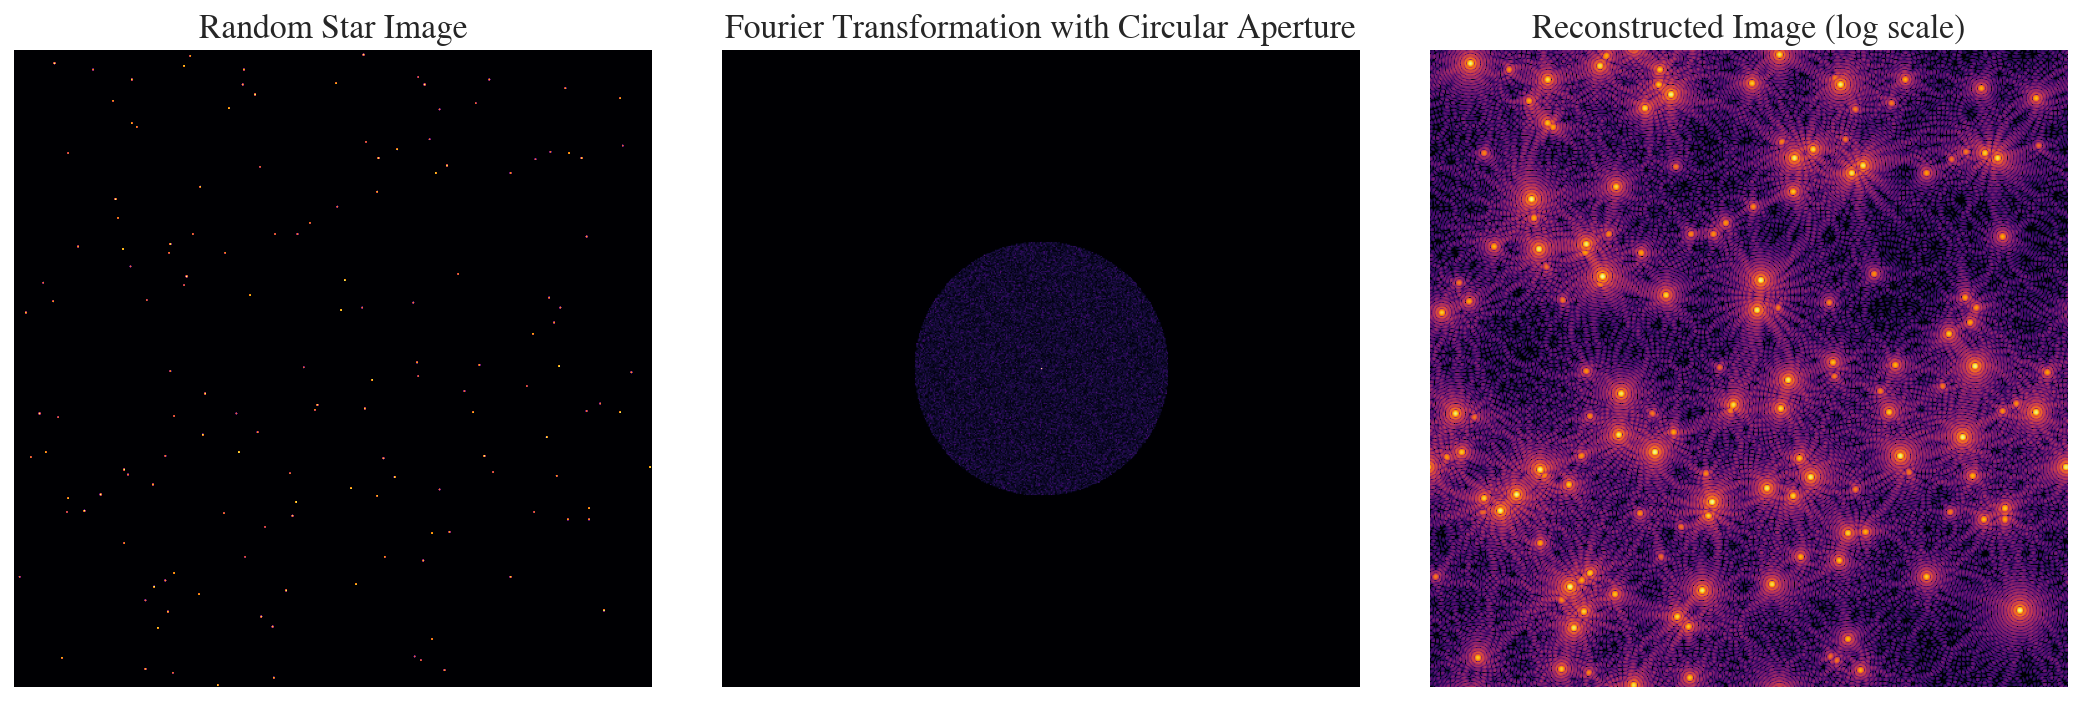

In [88]:
# Parameters for the simulation
size = 512  # Size of the image
intensity = 1  # Intensity of the stars
num_stars = 150  # Number of point sources

# Create a new image with random point sources
image_random_stars = np.ones((size, size))*1e-5
np.random.seed(0)  # Seed for reproducibility
for _ in range(num_stars):
    x_coord = np.random.randint(0, size)
    y_coord = np.random.randint(0, size)
    image_random_stars[y_coord, x_coord] = 10**np.random.uniform(0,intensity,1)

# Perform Fourier Transform on the image with random point sources
fourier_transform_random_stars = np.fft.fftshift(np.fft.fft2(image_random_stars))

# Define a circular aperture function
def circular_aperture(size, radius=None):
    """Create a circular aperture (pupil function)"""
    if radius is None:
        radius = size // 4  # Default radius is 1/4 of the size
    yy, xx = np.ogrid[:size, :size]
    circle = (xx - size // 2) ** 2 + (yy - size // 2) ** 2
    aperture = circle <= radius ** 2
    return aperture.astype(float)

# Define the radius of the circular aperture in pixels
aperture_radius = size // 5

# Create the circular aperture (pupil function)
circular_aperture = circular_aperture(size, radius=aperture_radius)

# Apply the circular aperture to the Fourier transform of the random stars
fourier_transform_random_stars_applied = fourier_transform_random_stars * circular_aperture

# Perform Inverse Fourier Transform to reconstruct the image with the circular aperture
reconstructed_image_random_stars_with_aperture = np.fft.ifft2(np.fft.ifftshift(fourier_transform_random_stars_applied))
reconstructed_image_random_stars_with_aperture = np.abs(reconstructed_image_random_stars_with_aperture)

# Plot the new image with random stars, circular aperture, and its reconstruction
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# New image with random point sources
axes[0].imshow(image_random_stars, cmap="inferno",norm=mpl.colors.LogNorm(vmin=0.01))
axes[0].set_title('Random Star Image')
axes[0].axis('off')

# Circular aperture
axes[1].imshow(np.abs(fourier_transform_random_stars_applied), cmap='inferno')
axes[1].set_title('Fourier Transformation with Circular Aperture')
axes[1].axis('off')

# Reconstructed image with circular aperture
axes[2].imshow(reconstructed_image_random_stars_with_aperture, cmap='inferno',norm=mpl.colors.LogNorm(vmin=0.001))
axes[2].set_title('Reconstructed Image (log scale)')
axes[2].axis('off')

plt.tight_layout()
plt.show()
